# Dataset 2

In [6]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from functions import rbf_kernel, predict, accuracy, plot_decision_boudary, f1_score, quad, MySVM
from mlxtend.plotting import plot_decision_regions
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.svm import SVC
from functions import rbf_kernel, predict, accuracy, f1_score, MySVM, quad, confusion_matrix, roc_plot
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [7]:
filename = 'data_2.h5'
f = h5py.File(filename, 'r')

X = np.array(f[list(f.keys())[0]])
y = np.array(f[list(f.keys())[1]])
print('Number of samples in dataset 2: ', len(y))

unique, counts = np.unique(y, return_counts=True)
print('Distribution of samples among different classes: ', counts)


Number of samples in dataset 2:  100
Distribution of samples among different classes:  [50 50]


## (i) Scatter the data

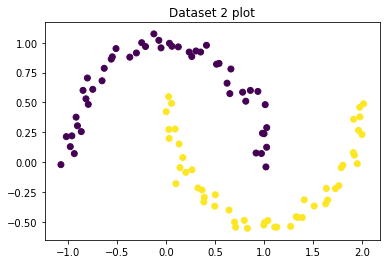

In [8]:
plt.figure()
plt.title('Dataset 2 plot')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('dataset2_plot.png')
plt.show()

## (ii) Plot the dataset with decision boundaries corresponding to the kernel used

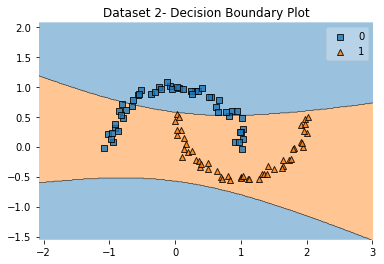

In [9]:
clf = SVC(kernel=quad)
clf.fit(X, y)
plot_decision_regions(X, y, clf=clf)
plt.title('Dataset 2- Decision Boundary Plot')
plt.savefig('dataset2_decision_boundary_plot.png')
plt.show()

## (iii) Soft margin SVM with linear kernel

Accuracy:  0.95
F1 Score:  1.0


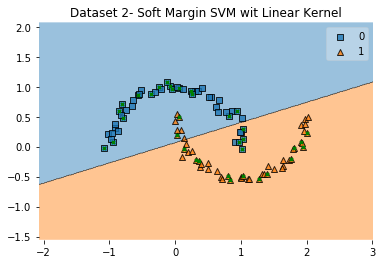

In [10]:
clf = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf.fit(X_train, y_train)
r = predict(X_test, clf._get_coef()[0], clf.intercept_)
print('Accuracy: ', accuracy(r, y_test))
print('F1 Score: ', f1_score(y_test, r))
plot_decision_regions(X, y, clf=clf)

sv_idx = clf.support_
plt.scatter(X[sv_idx, 0], X[sv_idx, 1], c='g', marker='x', s=10)
plt.title('Dataset 2- Soft Margin SVM wit Linear Kernel')
plt.savefig('dataset2_soft_margin_linear.png')
plt.show()


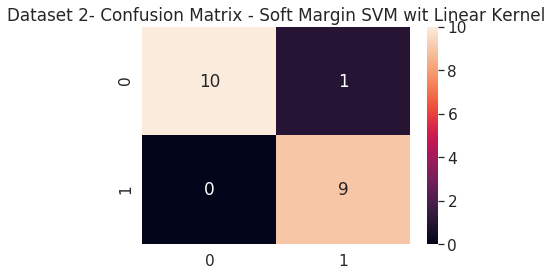

In [11]:
sb = confusion_matrix(y_test, r)
plt.title('Dataset 2- Confusion Matrix - Soft Margin SVM wit Linear Kernel')
plt.savefig('dataset2_soft_margin_linear_cm.png')

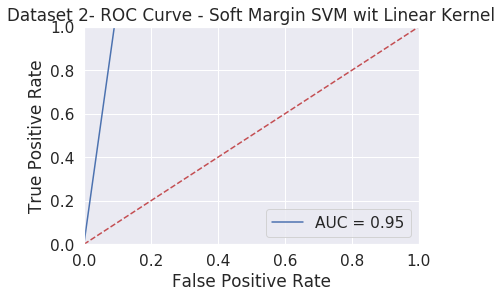

In [12]:
roc_plot(y_test, r)
plt.title('Dataset 2- ROC Curve - Soft Margin SVM wit Linear Kernel')
plt.savefig('dataset2_soft_margin_linear_roc.png')


## (iv) Soft margin SVM with rbf kernel

1.0
1.0


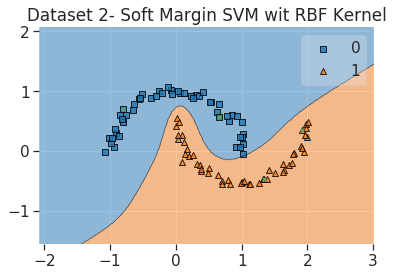

In [13]:
gamma = -4
C = 100
kX = np.hstack((X, rbf_kernel(X, gamma)))
X_train, X_test, y_train, y_test = train_test_split(kX, y, test_size=0.20)
clf = MySVM(kernel=rbf_kernel, gamma=gamma, C=C)
clf.fit(X_train, y_train)
r = predict(X_test, clf.clf._get_coef()[0], clf.clf.intercept_)
print(accuracy(r, y_test))
print(f1_score(y_test, r))
plot_decision_regions(X, y, clf=clf)
sv_idx = clf.clf.support_
plt.scatter(X[sv_idx, 0], X[sv_idx, 1], c='g', marker='x', s=10)
plt.title('Dataset 2- Soft Margin SVM wit RBF Kernel')
plt.savefig('dataset2_soft_margin_rbf.png')
plt.show()

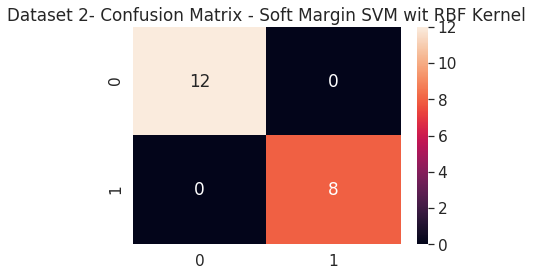

In [12]:
sb = confusion_matrix(y_test, r)
plt.title('Dataset 2- Confusion Matrix - Soft Margin SVM wit RBF Kernel')
plt.savefig('dataset2_soft_margin_rbf_cm.png')

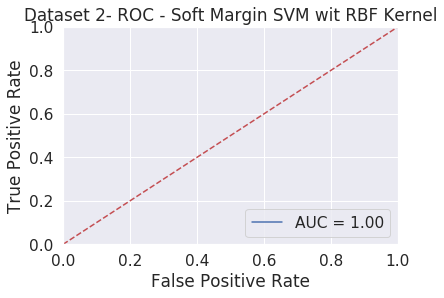

In [14]:
roc_plot(y_test, r)
plt.title('Dataset 2- ROC - Soft Margin SVM wit RBF Kernel')
plt.savefig('dataset2_soft_margin_rbf_roc.png')